# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de búsqueda de hiperparámetros para un modelo de Máquina de Soporte Vectorial (SVM).

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **22 de noviembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [2]:
#Para Collab.
#df = pd.read_csv('waterPotability/water_potability.csv').dropna()
main_path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/Machine Learning/Trabajos/ML_hw5/waterPotability/water_potability.csv"
df = pd.read_csv(main_path)
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

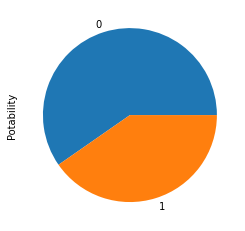

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

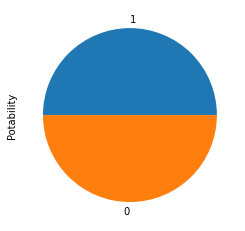

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [7]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Separación en Conjuntos de Validación/Prueba

Separe los datos (`X` y `y`) en conjuntos de:

- Entrenamiento (70%)
- Validación (15%)
- Prueba (15%)

Utilizando `train_test_split`.

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=3)

In [9]:
print(len(x_train),len(x_val),len(x_test))

1680 360 360


## Parte 1: Evaluación de Modelos y GridSearch

Como recordará, en la tarea anterior se realizó un proceso de GridSearch y RandomizedSearch. En esta ocasión, nuevamente implementará este procedimiento para encontrar los mejores hiperparámetros.

Esta vez, se le solicita **desarrollar cada uno de los casos de forma manual y sin utilizar la librería SciKit-Learn (utilice ciclos `for`), obtener los mejores parámetros para los datos de VALIDACIÓN y graficar el histórico para los rangos del parámetro de regularización.**

- Kernel: Lineal, Polinomial (utilizar grados 1, 2, 3 y 4), Función Base Radial (RBF), Sigmoide.
- Parámetro de Regularización: Recorrido en escala logarítmica desde $10^{-3}$ hasta $10^{5}$.

Utilice la función `SVC` de `sklearn.svm` para definir y ajustar cada modelo.

In [ ]:
#para_regul = np.linspace(1E-3,1E5,num = 10)
para_regul_lineal = np.logspace(-3,3,num = 10)
print(para_regul_lineal)
para_regul = np.logspace(-3,5,num = 10)
print(para_regul)

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]
[1.00000000e-03 7.74263683e-03 5.99484250e-02 4.64158883e-01
 3.59381366e+00 2.78255940e+01 2.15443469e+02 1.66810054e+03
 1.29154967e+04 1.00000000e+05]


### Búsqueda de Hiperparámetros con GridSearch

#### Caso 1: Kernel Lineal

In [ ]:
max_score_lineal = 0
score_lineal = np.array([])
best_model_lineal = 0
for i in para_regul_lineal:
    svc_linear = SVC(kernel='linear',C=i)
    svc_linear.fit(x_train,y_train)
    pred = svc_linear.predict(x_test)
    sco_lineal = accuracy_score(y_test,pred)
    score_lineal = np.append(score_lineal,sco_lineal)
    if sco_lineal > max_score_lineal:
        print(sco_lineal,i)
        max_score_lineal = sco_lineal
        best_model_lineal = svc_linear

0.4388888888888889 0.001
0.4638888888888889 0.004641588833612777
0.46944444444444444 0.021544346900318832
0.4722222222222222 0.1
0.4861111111111111 0.46415888336127775


In [ ]:
print(f'the best score is {score_lineal.max()}')
print(f'The best model is with the C equal to {para_regul_lineal[np.argmax(score_lineal)]}')

the best score is 0.4861111111111111
The best model is with the C equal to 0.46415888336127775


#### Caso 2: Kernel Polinomial

In [ ]:
max_score_polinomial = 0
score_polinomial = np.zeros((4,10))
best_model_poli = 0
deg = [i for i in range(1,4,1)]
for id,i in enumerate(para_regul):
    for idx,j in enumerate(deg):
        svc_poly = SVC(kernel='poly',C=i,degree=j)
        svc_poly.fit(x_train,y_train)
        pred = svc_poly.predict(x_test)
        sco_poly = accuracy_score(y_test,pred)
        score_polinomial[idx,id] = sco_poly
        if sco_poly > max_score_polinomial:
            print(sco_poly,i,j)
            max_score_polinomial = sco_poly
            best_model_poli = svc_poly

0.4638888888888889 0.001 1
0.5222222222222223 0.007742636826811269 2
0.5333333333333333 0.05994842503189409 2


In [ ]:
print(f'the best score is {score_polinomial.max()}')
#print(f'The best model is with the C equal to {para_regul[np.argmax(score_polinomial)]}')

the best score is 0.5333333333333333


#### Caso 3: Función Base Radial

In [ ]:
max_score_rbf = 0
score_rbf = np.array([])
best_model_rbf = 0
for i in para_regul:
    svc_rbf = SVC(kernel='rbf',C=i)
    svc_rbf.fit(x_train,y_train)
    pred = svc_rbf.predict(x_test)
    sco_rbf = accuracy_score(y_test,pred)
    score_rbf = np.append(score_rbf,sco_rbf)
    if sco_rbf > max_score_rbf:
        print(sco_rbf,i)
        max_score_rbf = sco_rbf
        best_model_rbf = svc_rbf

0.4638888888888889 0.001
0.4861111111111111 0.05994842503189409
0.49722222222222223 0.46415888336127775
0.5 3.593813663804626
0.5083333333333333 1668.1005372000557
0.5444444444444444 12915.496650148827


In [ ]:
print(f'the best score is {score_rbf.max()}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score_rbf)]}')

the best score is 0.5444444444444444
The best model is with the C equal to 12915.496650148827


#### Caso 4: Kernel Sigmoide

In [ ]:
max_score_sigm = 0
score_sigm = np.array([])
best_model_sigm = 0
for i in para_regul:
    svc_sigm = SVC(kernel='sigmoid',C=i)
    svc_sigm.fit(x_train,y_train)
    pred = svc_sigm.predict(x_test)
    sco_sigm = accuracy_score(y_test,pred)
    score_sigm = np.append(score_sigm,sco_sigm)
    if sco_sigm > max_score_sigm:
        print(sco_sigm)
        max_score_sigm = sco_sigm
        best_model_sigm = svc_sigm

0.4638888888888889
0.49444444444444446
0.49722222222222223


In [ ]:
print(f'the best score is {score_sigm.max()}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score_sigm)]}')

the best score is 0.49722222222222223
The best model is with the C equal to 27.825594022071257


### Best results

In [ ]:
print(f'the best score for SVC linear: {score_lineal.max()} (C=0.46416)')
print('\n')
print(f'the best score for SVC Polinomial: {score_polinomial.max()} (Degree: 2, C=0.05995)')
print('\n')
print(f'the best score for SVC rbf: {score_rbf.max()} (C=12915.49665)')
print('\n')
print(f'the best score for SVC sigmoid {score_sigm.max()} (C=27.82559)')


the best score for SVC linear: 0.4861111111111111 (C=0.46416)


the best score for SVC Polinomial: 0.5333333333333333 (Degree: 2, C=0.05995)


the best score for SVC rbf: 0.5444444444444444 (C=12915.49665)


the best score for SVC sigmoid 0.49722222222222223 (C=27.82559)


### Other iteration of Grid Search around the best point

In [ ]:
C = np.linspace(11500,13500,num=100)
print(C)

[11500.         11520.2020202  11540.4040404  11560.60606061
 11580.80808081 11601.01010101 11621.21212121 11641.41414141
 11661.61616162 11681.81818182 11702.02020202 11722.22222222
 11742.42424242 11762.62626263 11782.82828283 11803.03030303
 11823.23232323 11843.43434343 11863.63636364 11883.83838384
 11904.04040404 11924.24242424 11944.44444444 11964.64646465
 11984.84848485 12005.05050505 12025.25252525 12045.45454545
 12065.65656566 12085.85858586 12106.06060606 12126.26262626
 12146.46464646 12166.66666667 12186.86868687 12207.07070707
 12227.27272727 12247.47474747 12267.67676768 12287.87878788
 12308.08080808 12328.28282828 12348.48484848 12368.68686869
 12388.88888889 12409.09090909 12429.29292929 12449.49494949
 12469.6969697  12489.8989899  12510.1010101  12530.3030303
 12550.50505051 12570.70707071 12590.90909091 12611.11111111
 12631.31313131 12651.51515152 12671.71717172 12691.91919192
 12712.12121212 12732.32323232 12752.52525253 12772.72727273
 12792.92929293 12813.131

In [ ]:
max_score_rbf = 0
score_rbf = np.array([])
best_model_rbf = 0
for i in C:
    svc_rbf = SVC(kernel='rbf',C=i)
    svc_rbf.fit(x_train,y_train)
    pred = svc_rbf.predict(x_test)
    sco_rbf = accuracy_score(y_test,pred)
    score_rbf = np.append(score_rbf,sco_rbf)
    if sco_rbf > max_score_rbf:
        print(sco_rbf,i)
        max_score_rbf = sco_rbf
        best_model_rbf = svc_rbf

0.5472222222222223 11500.0


## Parte 2: Análisis de Resultados

Ahora, basado en los resultados anteriores, obtenga una evaluación final del mejor modelo y concluya sobre la pertinencia del mismo dentro del contexto de este problema.

In [10]:
from sklearn.metrics import accuracy_score,classification_report

best_classifier = SVC(C=11500, kernel='rbf') # Parámetros del clasificador #
best_classifier.fit(x_train, y_train)    

y_pred_rf = best_classifier.predict(x_val)

# Evaluación
print(f"Best classifier: {accuracy_score(y_val,y_pred_rf)}")
print(f"Reporte de Clasificación:\n{classification_report(y_val, y_pred_rf)}")

Best classifier: 0.5444444444444444
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.73      0.62       182
           1       0.56      0.36      0.44       178

    accuracy                           0.54       360
   macro avg       0.55      0.54      0.53       360
weighted avg       0.55      0.54      0.53       360



## Conclusiones

El mejor modelo que se escogió fue el kernel con la función Base Radial dado que el score fue el mayor. Los scores obtenidos fueron: 

* Kernel lineal: 0.4861

* Kernel Polinomial (grado 2): 0.5333

* Kernel Base Radial: 0.5444

* Kernel Sigmoide: 0.4972

Con base en lo anterior se realiza otra itereación de Grid Search alrededor del mejor punto encontrado (C). De esta manera, el valor final obtenido es 11500. Sobre este se realizan la validación respectiva. Se puede observar que tiene mayor precisión en la clase 1 que en la clase 0. A pesar de que se validó en el mejor modelo, no se presento una precisión tan alta. 

### Other tests

In [22]:
import matplotlib.pyplot as plt

gridSearch_gamma = np.logspace(-5,1,num=10)
accuracy_array = np.array([])
for i in gridSearch_gamma:
    best_classifier = SVC(C=11500, kernel='rbf',gamma=i) # Parámetros del clasificador #
    best_classifier.fit(x_train, y_train)    
    y_pred_rf = best_classifier.predict(x_val)
    accuracy_array = np.append(accuracy_array,accuracy_score(y_val,y_pred_rf))

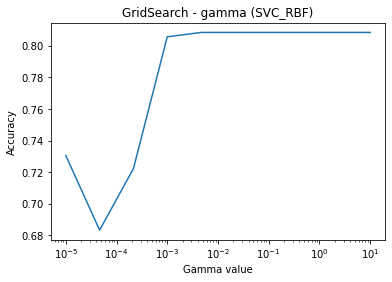

In [26]:
plt.plot(gridSearch_gamma,accuracy_array)
plt.xscale('log')
plt.title('GridSearch - gamma (SVC_RBF)')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()

Se decidio seguir sintonizando los hiperparametros con el proposito de obtener un mejor modelo, en este caso aprovechando que se utilizo un Kernel RBF, se decidio variar el parametro gamma, el cual nos permite modificar la geometria (Aumentar o disminuir las curvas de la region de decision), con esto se obtuvo un mejor rendimiento del mejor modelo, llegando asintoticamente a un accuracy de 0.808333.